Lab: TensorFlow Tensors, Keras
Functional API, Model Save & Restore
(MNIST Version)

1. Tensor Basics

In [ ]:
import tensorflow as tf
# Create tensors
scalar = tf.constant(7)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)

Scalar: tf.Tensor(7, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Matrix: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
# Tensor operations
added = tf.add(vector, [4, 5, 6])
multiplied = tf.multiply(matrix, 2)
reshaped = tf.reshape(matrix, [4, 1])
print("Added vector:", added.numpy())
print("Multiplied matrix:", multiplied.numpy())
print("Reshaped matrix:", reshaped.numpy())

Added vector: [5 7 9]
Multiplied matrix: [[2 4]
 [6 8]]
Reshaped matrix: [[1]
 [2]
 [3]
 [4]]


2. Tensor Fundamentals — Shapes, Dtypes, and
Gradients

In [ ]:
import numpy as np
a = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)
b = tf.constant([[0.5, 0.25], [0.75, 1.0]], dtype=tf.float32)
c = tf.convert_to_tensor(np.arange(12).reshape(3, 4), dtype=tf.float32)
print('Tensor a:', a)
print('Tensor b dtype:', b.dtype, 'shape:', b.shape)
print('Tensor c shape & values:\n', c.numpy())

Tensor a: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor b dtype: <dtype: 'float32'> shape: (2, 2)
Tensor c shape & values:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


In [ ]:
 #Broadcasting example
x = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[5.], [6.]]) # Will broadcast to match x's shape
print('x + y (broadcasted):\n', x + y)
print('Matrix multiplication (x @ x):\n', tf.matmul(x, x))

x + y (broadcasted):
 tf.Tensor(
[[ 6.  7.]
 [ 9. 10.]], shape=(2, 2), dtype=float32)
Matrix multiplication (x @ x):
 tf.Tensor(
[[ 7. 10.]
 [15. 22.]], shape=(2, 2), dtype=float32)


In [ ]:
#Gradient example
x = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
    y = tf.reduce_sum(x ** 2)
    dy_dx = tape.gradient(y, x)
print('dy/dx =', dy_dx.numpy())

dy/dx = [[2. 4.]
 [6. 8.]]


3. Build MNIST Model using Keras Functional API

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build model
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_functional_model')
model.summary()

Model: "mnist_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile and Train

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7984 - loss: 0.6658 - val_accuracy: 0.9560 - val_loss: 0.1588
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9433 - loss: 0.1938 - val_accuracy: 0.9657 - val_loss: 0.1210
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9559 - loss: 0.1431 - val_accuracy: 0.9693 - val_loss: 0.1085
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9640 - loss: 0.1153 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9656 - loss: 0.1052 - val_accuracy: 0.9746 - val_loss: 0.0955


Evaluate Model

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9732 - loss: 0.0864
Test accuracy: 0.9732


Plot Training History

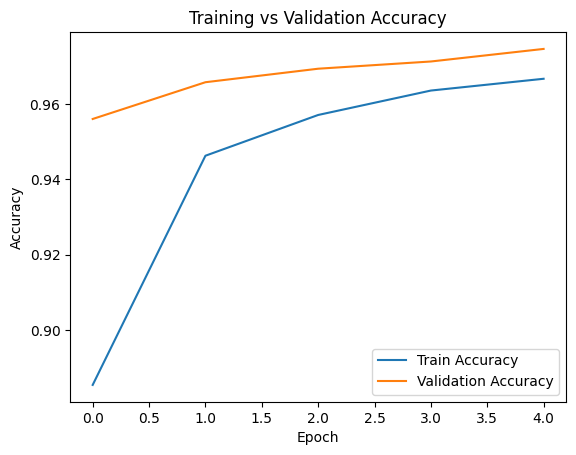

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4. Save and Restore Models

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Save and Restore Models

In [ ]:

# Save the model to Google Drive
save_path = '/content/drive/MyDrive/model.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

 Model saved successfully to /content/drive/MyDrive/model.keras


Restore Models

In [ ]:
load_path = '/content/drive/MyDrive/model.keras'
loaded_model = keras.models.load_model(load_path)
print(' Model loaded successfully from Drive.')

 Model loaded successfully from Drive.


5. Model Checkpoints

In [ ]:
import os
save_dir = os.path.dirname(save_path)
checkpoint_path = os.path.join(save_dir, 'training_checkpoints', 'cp.weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
save_weights_only=True,
verbose=1,
save_freq='epoch')
model.fit(x_train, y_train, epochs=2, batch_size=64, callbacks=[cp_callback])

Epoch 1/2
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9710 - loss: 0.0992
Epoch 1: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9710 - loss: 0.0992
Epoch 2/2
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9717 - loss: 0.0922
Epoch 2: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9717 - loss: 0.0922


6. Exercises

In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print('Latest checkpoint:', latest_checkpoint)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Restored checkpoint model accuracy: {acc:.4f}")
else:
    print("No checkpoint found in the specified directory.")

Latest checkpoint: None
Restored checkpoint model accuracy: 0.9737


6. Exercises

1. Add Batch Normalization layers and compare accuracy.
2. Try using SGD and RMSprop optimizers.
3. Add a skip connection between layers in the model.
4. Save and restore only the weights instead of the full model

Add Batch Normalization layers and compare accuracy

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the new model with Batch Normalization layers
inputs_bn = keras.Input(shape=(28, 28), name='input_layer_bn')
x_bn = layers.Flatten()(inputs_bn)
x_bn = layers.Dense(128)(x_bn) # No activation here, activation comes after BatchNormalization
x_bn = layers.BatchNormalization()(x_bn)
x_bn = layers.Activation('relu')(x_bn)
x_bn = layers.Dropout(0.3)(x_bn)
x_bn = layers.Dense(64)(x_bn) # No activation here
x_bn = layers.BatchNormalization()(x_bn)
x_bn = layers.Activation('relu')(x_bn)
outputs_bn = layers.Dense(10, activation='softmax', name='output_layer_bn')(x_bn)

model_bn = keras.Model(inputs=inputs_bn, outputs=outputs_bn, name='mnist_functional_model_bn')
model_bn.summary()

# Compile the new model
model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the new model
history_bn = model_bn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the new model
test_loss_bn, test_acc_bn = model_bn.evaluate(x_test, y_test, verbose=2)
print(f"\nOriginal model test accuracy: {test_acc:.4f}")
print(f"New model with Batch Normalization test accuracy: {test_acc_bn:.4f}")

Model: "mnist_functional_model_bn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_bn (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_bn (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8119 - loss: 0.6620 - val_accuracy: 0.9519 - val_loss: 0.1643
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9383 - loss: 0.2039 - val_accuracy: 0.9665 - val_loss: 0.1135
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9527 - loss: 0.1552 - val_accuracy: 0.9699 - val_loss: 0.1023
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9603 - loss: 0.1285 - val_accuracy: 0.9728 - val_loss: 0.0899
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9649 - loss: 0.1112 - val_accuracy: 0.9752 - val_loss: 0.0823
313/313 - 1s - 2ms/step - accuracy: 0.9745 - loss: 0.0796

Original model test accuracy: 0.9732
New model with Batch Normalization test accuracy: 0.9745


2.Try using SGD and RMSprop optimizers.

In [ ]:
# Using SGD optimizer
model_sgd = keras.Model(inputs=inputs, outputs=outputs)
model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
loss_sgd, acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy with SGD: {acc_sgd:.4f}")

# Using RMSprop optimizer
model_rms = keras.Model(inputs=inputs, outputs=outputs)
model_rms.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_rms = model_rms.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
loss_rms, acc_rms = model_rms.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy with RMSprop: {acc_rms:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9773 - loss: 0.0684 - val_accuracy: 0.9855 - val_loss: 0.0491
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9814 - loss: 0.0600 - val_accuracy: 0.9859 - val_loss: 0.0478
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9823 - loss: 0.0536 - val_accuracy: 0.9859 - val_loss: 0.0476
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9818 - loss: 0.0539 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0563 - val_accuracy: 0.9853 - val_loss: 0.0472
Test accuracy with SGD: 0.9785
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9777 - loss: 0.0699 - val_accuracy: 0.9826 - val_loss: 0.0606
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9779 - loss: 0.0694 - val_accuracy: 0.9810 - val_loss: 0.0655
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9804 - loss: 0.

Add a skip connection between layers in the model.

In [ ]:
# Using SGD optimizer
model_sgd = keras.Model(inputs=inputs, outputs=outputs)
model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
loss_sgd, acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy with SGD: {acc_sgd:.4f}")

# Using RMSprop optimizer
model_rms = keras.Model(inputs=inputs, outputs=outputs)
model_rms.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_rms = model_rms.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
loss_rms, acc_rms = model_rms.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy with RMSprop: {acc_rms:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.9840 - val_loss: 0.0594
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9842 - val_loss: 0.0580
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9845 - val_loss: 0.0577
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9848 - val_loss: 0.0574
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9843 - val_loss: 0.0574
Test accuracy with SGD: 0.9804
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9814 - loss: 0.0573 - val_accuracy: 0.9831 - val_loss: 0.0662
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9835 - loss: 0.0542 - val_accuracy: 0.9816 - val_loss: 0.0773
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9826 - loss: 0.

4. Save and restore only the weights instead of the full model

In [ ]:
# Functional API with skip connection
inputs = keras.Input(shape=(28,28))
x = layers.Flatten()(inputs)
x1 = layers.Dense(128, activation='relu')(x)
x2 = layers.Dense(128, activation='relu')(x1)

# Skip connection: add output of first dense to second
x_skip = layers.Add()([x1, x2])
x_skip = layers.Dense(64, activation='relu')(x_skip)
outputs = layers.Dense(10, activation='softmax')(x_skip)

model_skip = keras.Model(inputs=inputs, outputs=outputs)

# Compile and train
model_skip.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_skip = model_skip.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate accuracy
loss_skip, acc_skip = model_skip.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy with skip connection: {acc_skip:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8450 - loss: 0.5154 - val_accuracy: 0.9610 - val_loss: 0.1328
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9657 - loss: 0.1151 - val_accuracy: 0.9700 - val_loss: 0.1001
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9768 - loss: 0.0756 - val_accuracy: 0.9726 - val_loss: 0.0916
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9832 - loss: 0.0530 - val_accuracy: 0.9731 - val_loss: 0.0915
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9695 - val_loss: 0.1028
Test accuracy with skip connection: 0.9737


In [ ]:
import os

# Save only weights
weights_path = "mnist_weights.weights.h5"
model_skip.save_weights(weights_path)  # Save weights only

# Create a new model with same architecture
new_model = keras.Model(inputs=inputs, outputs=outputs)
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load saved weights
new_model.load_weights(weights_path)

# Evaluate restored model
loss_restored, acc_restored = new_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy after restoring weights: {acc_restored:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Test accuracy after restoring weights: 0.9737
